In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [70]:
# Function to scrape table data from a given URL
def scrape_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table')

    # Extract headers excluding the unwanted one
    headers = [header.text.strip() for header in tables[0].find_all('th')]
    if 'Status Known For 39 out of 39 Constituencies' in headers:
        headers.remove('Status Known For 39 out of 39 Constituencies')
    df = pd.DataFrame(columns=headers)

    rows = tables[0].find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        row_data = [col.text.strip() for col in cols]

        # Skip empty rows
        if not row_data:
            continue

        # Handle mismatch in the number of columns and data elements
        if len(row_data) == len(df.columns):
            df.loc[len(df)] = row_data
        else:
            if len(row_data) < len(df.columns):
                row_data.extend([None] * (len(df.columns) - len(row_data)))
            elif len(row_data) > len(df.columns):
                row_data = row_data[:len(df.columns)]
            df.loc[len(df)] = row_data

    return df

# URLs of the HTML files
url1 = "https://results.eci.gov.in/PcResultGenJune2024/statewiseS221.htm"
url2 = "https://results.eci.gov.in/PcResultGenJune2024/statewiseS222.htm"

# Scrape data from both URLs
df1 = scrape_table(url1)
df2 = scrape_table(url2)

# Combine the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)


In [31]:
combined_df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,
0,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra KazhagamiParty Wise State Tre...,Dravida Munnetra Kazhagam,iParty Wise State TrendsLeading In:0Won In:22T...,Leading In,:,0
1,Dravida Munnetra Kazhagam,iParty Wise State TrendsLeading In:0Won In:22T...,Leading In,:,0,Won In,:,22,Trailing In
2,Leading In,:,0,None,None,None,None,None,None
3,Won In,:,22,None,None,None,None,None,None
4,Trailing In,:,0,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
346,Trailing In,:,0,None,None,None,None,None,None
347,Desiya Murpokku Dravida Kazhagam,iParty Wise State TrendsLeading In:0Won In:0Tr...,Leading In,:,0,Won In,:,0,Trailing In
348,Leading In,:,0,None,None,None,None,None,None
349,Won In,:,0,None,None,None,None,None,None


In [43]:
# Save to CSV
combined_df.to_csv('combined_election_results.csv', index=False)
print("Data saved to combined_election_results.csv")


Data saved to combined_election_results.csv


In [32]:
print("Basic Information:")
print(combined_df.info())
print("\n")

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        351 non-null    object
 1   Const. No.          351 non-null    object
 2   Leading Candidate   351 non-null    object
 3   Leading Party       117 non-null    object
 4   Trailing Candidate  117 non-null    object
 5   Trailing Party      117 non-null    object
 6   Margin              117 non-null    object
 7   Status              117 non-null    object
 8                       117 non-null    object
dtypes: object(9)
memory usage: 24.8+ KB
None




In [33]:
print("Descriptive Statistics:")
print(combined_df.describe(include='all'))
print("\n")

Descriptive Statistics:
       Constituency Const. No. Leading Candidate Leading Party  \
count           351        351               351           117   
unique           55         45                45             8   
top      Leading In          :                 0             :   
freq             78        234               195            78   

       Trailing Candidate Trailing Party Margin Status               
count                 117            117    117    117          117  
unique                  8              5      2      6            2  
top                     0         Won In      :      :  Trailing In  
freq                   78             78     78     39           78  




In [35]:
print("Missing Values:")
print(combined_df.isnull().sum())
print("\n")

Missing Values:
Constituency            0
Const. No.              0
Leading Candidate       0
Leading Party         234
Trailing Candidate    234
Trailing Party        234
Margin                234
Status                234
                      234
dtype: int64




In [36]:
print("Unique Values:")
for column in combined_df.columns:
    print(f"{column}: {combined_df[column].nunique()} unique values")

print("\n")

Unique Values:
Constituency: 55 unique values
Const. No.: 45 unique values
Leading Candidate: 45 unique values
Leading Party: 8 unique values
Trailing Candidate: 8 unique values
Trailing Party: 5 unique values
Margin: 2 unique values
Status: 6 unique values
: 2 unique values




In [37]:
print("Leading Parties:")
print(combined_df['Leading Party'].value_counts())
print("\n")

Leading Parties:
Leading Party
:                                                                                                  78
Dravida Munnetra KazhagamiParty Wise State TrendsLeading In:0Won In:22Trailing In:0                22
Indian National CongressiParty Wise State TrendsLeading In:0Won In:9Trailing In:0                   9
Viduthalai Chiruthaigal KatchiiParty Wise State TrendsLeading In:0Won In:2Trailing In:0             2
Communist Party of India  (Marxist)iParty Wise State TrendsLeading In:0Won In:2Trailing In:0        2
Communist Party of IndiaiParty Wise State TrendsLeading In:0Won In:2Trailing In:0                   2
Indian Union Muslim LeagueiParty Wise State TrendsLeading In:0Won In:1Trailing In:0                 1
Marumalarchi Dravida Munnetra KazhagamiParty Wise State TrendsLeading In:0Won In:1Trailing In:0     1
Name: count, dtype: int64




In [38]:
print("Trailing Parties:")
print(combined_df['Trailing Party'].value_counts())
print("\n")

Trailing Parties:
Trailing Party
Won In                                                        78
iParty Wise State TrendsLeading In:0Won In:22Trailing In:0    22
iParty Wise State TrendsLeading In:0Won In:9Trailing In:0      9
iParty Wise State TrendsLeading In:0Won In:2Trailing In:0      6
iParty Wise State TrendsLeading In:0Won In:1Trailing In:0      2
Name: count, dtype: int64




In [39]:
print("Margin Analysis:")
combined_df['Margin'] = pd.to_numeric(combined_df['Margin'], errors='coerce')  # Convert Margin to numeric
print(combined_df['Margin'].describe())
print("\n")

Margin Analysis:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Margin, dtype: float64




In [40]:
print("Status Analysis:")
print(combined_df['Status'].value_counts())
print("\n")

Status Analysis:
Status
:     39
0     39
22    22
9      9
2      6
1      2
Name: count, dtype: int64




In [41]:
print("Top 5 Constituencies with Largest Margin:")
print(combined_df.nlargest(5, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']])
print("\n")

Top 5 Constituencies with Largest Margin:
                Constituency  Leading Candidate  \
0                  ARAKKONAM  S JAGATHRATCHAKAN   
1  Dravida Munnetra Kazhagam         Leading In   
2                 Leading In                  0   
3                     Won In                 22   
4                Trailing In                  0   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  
1                                                  :     NaN  
2                                               None     NaN  
3                                               None     NaN  
4                                               None     NaN  




In [42]:
print("Top 5 Constituencies with Smallest Margin:")
print(combined_df.nsmallest(5, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']])
print("\n")

Top 5 Constituencies with Smallest Margin:
                Constituency  Leading Candidate  \
0                  ARAKKONAM  S JAGATHRATCHAKAN   
1  Dravida Munnetra Kazhagam         Leading In   
2                 Leading In                  0   
3                     Won In                 22   
4                Trailing In                  0   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  
1                                                  :     NaN  
2                                               None     NaN  
3                                               None     NaN  
4                                               None     NaN  




F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


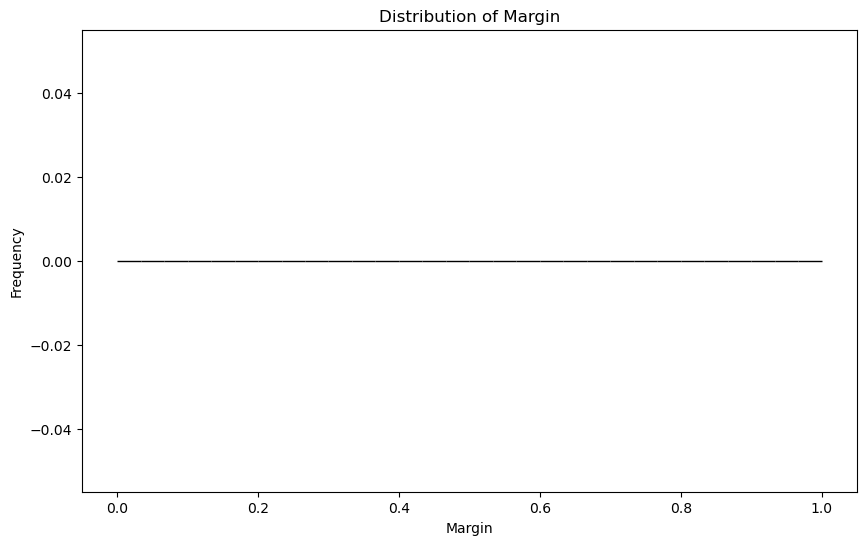

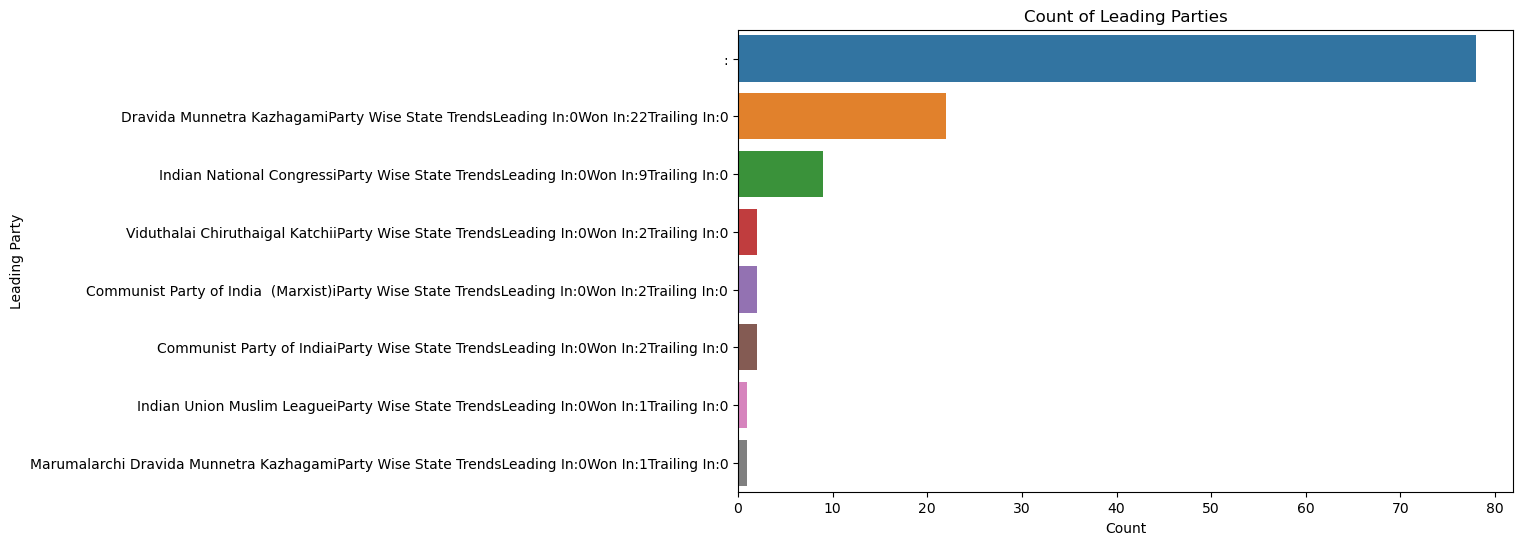

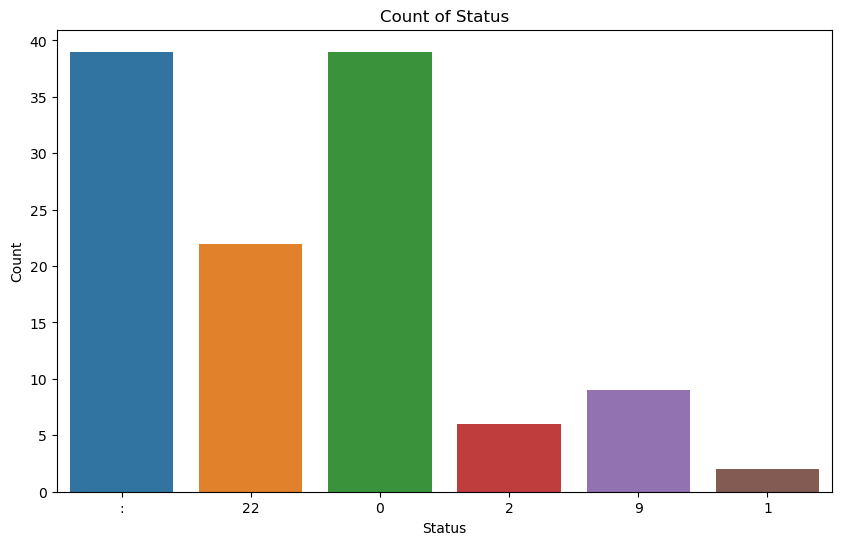

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Margin
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Margin'], bins=30)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

# Leading Party Counts
plt.figure(figsize=(10, 6))
sns.countplot(y='Leading Party', data=combined_df, order=combined_df['Leading Party'].value_counts().index)
plt.title('Count of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

# Status Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=combined_df)
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [45]:
top_5_largest_margin = combined_df.nlargest(5, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]
print("Top 5 Constituencies with Largest Margin:")
print(top_5_largest_margin)
print("\n")

Top 5 Constituencies with Largest Margin:
                Constituency  Leading Candidate  \
0                  ARAKKONAM  S JAGATHRATCHAKAN   
1  Dravida Munnetra Kazhagam         Leading In   
2                 Leading In                  0   
3                     Won In                 22   
4                Trailing In                  0   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  
1                                                  :     NaN  
2                                               None     NaN  
3                                               None     NaN  
4                                               None     NaN  




In [46]:
top_5_smallest_margin = combined_df.nsmallest(5, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]
print("Top 5 Constituencies with Smallest Margin:")
print(top_5_smallest_margin)
print("\n")

Top 5 Constituencies with Smallest Margin:
                Constituency  Leading Candidate  \
0                  ARAKKONAM  S JAGATHRATCHAKAN   
1  Dravida Munnetra Kazhagam         Leading In   
2                 Leading In                  0   
3                     Won In                 22   
4                Trailing In                  0   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  
1                                                  :     NaN  
2                                               None     NaN  
3                                               None     NaN  
4                                               None     NaN  




In [49]:
# 1. Total seats won by each party
total_seats_won = combined_df.groupby('Leading Party').size().reset_index(name='Seats Won')
print("1. Total seats won by each party:")
print(total_seats_won)

1. Total seats won by each party:
                                       Leading Party  Seats Won
0                                                  :         78
1  Communist Party of India  (Marxist)iParty Wise...          2
2  Communist Party of IndiaiParty Wise State Tren...          2
3  Dravida Munnetra KazhagamiParty Wise State Tre...         22
4  Indian National CongressiParty Wise State Tren...          9
5  Indian Union Muslim LeagueiParty Wise State Tr...          1
6  Marumalarchi Dravida Munnetra KazhagamiParty W...          1
7  Viduthalai Chiruthaigal KatchiiParty Wise Stat...          2


In [58]:
# 2. Top 5 constituencies with the largest winning margins
top_5_margins = combined_df.nlargest(5, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]
print("\n2. Top 5 constituencies with the largest winning margins:")
print(top_5_margins)




2. Top 5 constituencies with the largest winning margins:
                Constituency  Leading Candidate  \
0                  ARAKKONAM  S JAGATHRATCHAKAN   
1  Dravida Munnetra Kazhagam         Leading In   
2                 Leading In                  0   
3                     Won In                 22   
4                Trailing In                  0   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  
1                                                  :     NaN  
2                                               None     NaN  
3                                               None     NaN  
4                                               None     NaN  


In [59]:
# 3. Average winning margin for each party
average_margin_per_party = combined_df.groupby('Leading Party')['Margin'].mean().reset_index(name='Average Margin')
print("\n3. Average winning margin for each party:")
print(average_margin_per_party)




3. Average winning margin for each party:
                                       Leading Party  Average Margin
0                                                  :             NaN
1  Communist Party of India  (Marxist)iParty Wise...             NaN
2  Communist Party of IndiaiParty Wise State Tren...             NaN
3  Dravida Munnetra KazhagamiParty Wise State Tre...             NaN
4  Indian National CongressiParty Wise State Tren...             NaN
5  Indian Union Muslim LeagueiParty Wise State Tr...             NaN
6  Marumalarchi Dravida Munnetra KazhagamiParty W...             NaN
7  Viduthalai Chiruthaigal KatchiiParty Wise Stat...             NaN


In [60]:
# 4. Constituency with the smallest winning margin
smallest_margin = combined_df.nsmallest(1, 'Margin')[['Constituency', 'Leading Candidate', 'Leading Party', 'Margin']]

print("\n4. Constituency with the smallest winning margin:")
print(smallest_margin)




4. Constituency with the smallest winning margin:
  Constituency  Leading Candidate  \
0    ARAKKONAM  S JAGATHRATCHAKAN   

                                       Leading Party  Margin  
0  Dravida Munnetra KazhagamiParty Wise State Tre...     NaN  


In [61]:
# 5. Number of constituencies contested by each party
contested_constituencies = combined_df.groupby('Leading Party').size().reset_index(name='Contested Constituencies')
print("\n5. Number of constituencies contested by each party:")
print(contested_constituencies)



5. Number of constituencies contested by each party:
                                       Leading Party  Contested Constituencies
0                                                  :                        78
1  Communist Party of India  (Marxist)iParty Wise...                         2
2  Communist Party of IndiaiParty Wise State Tren...                         2
3  Dravida Munnetra KazhagamiParty Wise State Tre...                        22
4  Indian National CongressiParty Wise State Tren...                         9
5  Indian Union Muslim LeagueiParty Wise State Tr...                         1
6  Marumalarchi Dravida Munnetra KazhagamiParty W...                         1
7  Viduthalai Chiruthaigal KatchiiParty Wise Stat...                         2


In [62]:
# 6. Parties with the highest and lowest number of wins
party_wins = combined_df['Leading Party'].value_counts()
highest_wins_party = party_wins.idxmax()
lowest_wins_party = party_wins.idxmin()
print("\n6. Party with the highest number of wins:", highest_wins_party)
print("Party with the lowest number of wins:", lowest_wins_party)


6. Party with the highest number of wins: :
Party with the lowest number of wins: Indian Union Muslim LeagueiParty Wise State TrendsLeading In:0Won In:1Trailing In:0


In [63]:
# 7. Winning margin statistics (mean, median, max, min)
margin_statistics = combined_df['Margin'].agg(['mean', 'median', 'max', 'min']).reset_index(name='Statistic Value')
print("\n7. Winning margin statistics (mean, median, max, min):")
print(margin_statistics)



7. Winning margin statistics (mean, median, max, min):
    index  Statistic Value
0    mean              NaN
1  median              NaN
2     max              NaN
3     min              NaN


In [66]:
# 8. Number of constituencies where the margin was less than 5000 votes
close_contests = combined_df[combined_df['Margin'] < 5000].shape[0]
print("\n8. Number of constituencies where the margin was less than 5000 votes:", close_contests)


8. Number of constituencies where the margin was less than 5000 votes: 0


In [68]:
# 9. Number of seats won by new/emerging parties (assuming `Emerging Parties` list is available)
emerging_parties = ['Viduthalai Chiruthaigal Katchi', 'Communist Party of India']  
seats_won_by_emerging = combined_df[combined_df['Leading Party'].isin(emerging_parties)].shape[0]
print("\n9. Number of seats won by new/emerging parties:", seats_won_by_emerging)


10. Number of seats won by new/emerging parties: 0
